In [1]:
import pandas as pd
import numpy as np
import nltk
import re
import matplotlib.pyplot as plt

In [2]:
# Load the dataset

df = pd.read_csv("spam.csv",encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True) # drop the columns
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.columns = ["class","message"] # change the column name
df.head()

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df["len"] = [len(text) for text in df.message]
df.head()

,class,message,len
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [6]:
df.describe()

,len
count,5572.000000
mean,80.118808
std,59.690841
min,2.000000
25%,36.000000
50%,61.000000
75%,121.000000
max,910.000000


In [7]:
df.groupby('class').describe()

len                                                         
        count        mean        std   min    25%    50%    75%    max
class                                                                 
ham    4825.0   71.023627  58.016023   2.0   33.0   52.0   92.0  910.0
spam    747.0  138.866131  29.183082  13.0  132.5  149.0  157.0  224.0

In [8]:
df["class"].value_counts()/df["class"].shape[0]*100

ham     86.593683
spam    13.406317
Name: class, dtype: float64

### Word Cloud

In [9]:
stopwords_list = nltk.corpus.stopwords.words("english") # stopwords list for english
tokener = nltk.word_tokenize # to tokenize

In [10]:
# word cloud
# spam -- word cloud
# ham -- Word cloud

# BOW
# TFIDF_VECTORIZER
# train and test splits

# ML algorithm

In [11]:
from collections import Counter
# nltk.download('punkt')
common_words = {"word": [], "count": []}

for word in df["message"]:
    tok = tokener(word)
    # print(tok)
    m_counter = Counter(tok)
    # print(m_counter)
    # print(m_counter.most_common(1))
    common_words["word"].append(m_counter.most_common(1)[0][0])
    common_words["count"].append(m_counter.most_common(1)[0][1])
    # print("=========\n")

In [12]:
common_words_df = pd.concat([df, pd.DataFrame(common_words)], axis = 1)
common_words_df

,class,message,len,word,count
0,ham,"Go until jurong point, crazy.. Available only ...",111,...,2
1,ham,Ok lar... Joking wif u oni...,29,...,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,to,3
3,ham,U dun say so early hor... U c already then say...,49,U,2
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,he,2
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161,.,3
5568,ham,Will Ì_ b going to esplanade fr home?,37,Will,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,Pity,1
5570,ham,The guy did some bitching but I acted like i'd...,125,The,1


In [13]:
# ! pip install wordcloud

In [14]:
import wordcloud
words_cloud=wordcloud.WordCloud().generate_from_text(" ".join(common_words_df["word"]))

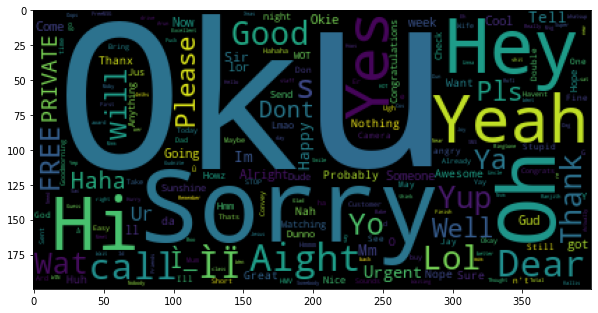

In [15]:
plt.figure(figsize=(10,6))
plt.imshow(words_cloud)
plt.show()

In [16]:
df = df.drop("len", axis = 1)
df.head()

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
df.message = df.message.apply(str.lower) #to make all the rows lower case without using for loop we can use apply function 

In [18]:
def remove_punch(text):
    clean_words=re.sub(r"[^a-zA-Z0-9]"," ",text.lower())
    return(clean_words)
df.message=df.message.apply(remove_punch)

In [19]:
df.message

0       go until jurong point  crazy   available only ...
1                           ok lar    joking wif u oni   
2       free entry in 2 a wkly comp to win fa cup fina...
3       u dun say so early hor    u c already then say   
4       nah i don t think he goes to usf  he lives aro...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                will    b going to esplanade fr home 
5569    pity    was in mood for that  so   any other s...
5570    the guy did some bitching but i acted like i d...
5571                           rofl  its true to its name
Name: message, Length: 5572, dtype: object

In [20]:
def remove_whitespace(text):
    
    clean_words = re.sub(' +', ' ', text)
    
    return clean_words

df.message = df.message.apply(remove_whitespace)

In [21]:
df.message

0       go until jurong point crazy available only in ...
1                                ok lar joking wif u oni 
2       free entry in 2 a wkly comp to win fa cup fina...
3            u dun say so early hor u c already then say 
4       nah i don t think he goes to usf he lives arou...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                   will b going to esplanade fr home 
5569    pity was in mood for that so any other suggest...
5570    the guy did some bitching but i acted like i d...
5571                            rofl its true to its name
Name: message, Length: 5572, dtype: object

In [22]:
def remove_stopwords(text):
    
    tok_word = tokener(text)
    
    clean_words = []
    
    for word in tok_word:
        if word in stopwords_list:
            continue
        else:
            clean_words.append(word)
    words = ' '.join(clean_words)
    return words

df.message = df.message.apply(remove_stopwords)

In [23]:
df.message

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry 2 wkly comp win fa cup final tkts 2...
3                     u dun say early hor u c already say
4                  nah think goes usf lives around though
                              ...                        
5567    2nd time tried 2 contact u u 750 pound prize 2...
5568                            b going esplanade fr home
5569                                pity mood suggestions
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: message, Length: 5572, dtype: object

In [24]:
ham_class = df[df["class"] == "ham"]
spam_class = df[df["class"] == "spam"]

In [25]:
ham_text=' '.join(ham_class.message)
spam_text=' '.join(spam_class.message)

In [26]:
ham_wordcloud = wordcloud.WordCloud().generate_from_text(ham_text)
spam_wordcloud = wordcloud.WordCloud().generate_from_text(spam_text)

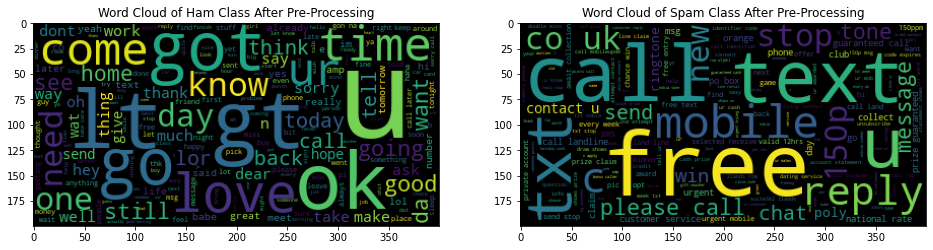

In [27]:
plt.figure(figsize=(16,12))
plt.subplot(121) #to show in a same line
plt.title("Word Cloud of Ham Class After Pre-Processing")
plt.imshow(ham_wordcloud)
plt.subplot(122)
plt.title("Word Cloud of Spam Class After Pre-Processing")
plt.imshow(spam_wordcloud)
plt.show()

In [28]:
def remove_digits(text):
    clean_words = re.sub(r"[^a-zA-Z]"," ",text.lower())
    return clean_words
df.message = df.message.apply(remove_digits)    

In [29]:
df.message[2]

'free entry   wkly comp win fa cup final tkts   st may      text fa       receive entry question std txt rate c apply            over  '

In [30]:
df.message = df.message.apply(remove_whitespace)

In [31]:
df.message[2]

'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply over '

In [32]:
lm=nltk.WordNetLemmatizer()

In [33]:
def lemma(text):
    tok_word = tokener(text)
    lemma_word =[]
    print("token :",tok_word)
    for tok in tok_word:
        lemma_tok = lm.lemmatize(tok)
        lemma_word.append(lemma_tok)
    print("lemmatization :",lemma_word)
    final_text= " ".join(lemma_word)
    print("Final text :",final_text)
    return final_text

df.message = df.message.apply(lemma)

token : ['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amore', 'wat']
lemmatization : ['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amore', 'wat']
Final text : go jurong point crazy available bugis n great world la e buffet cine got amore wat
token : ['ok', 'lar', 'joking', 'wif', 'u', 'oni']
lemmatization : ['ok', 'lar', 'joking', 'wif', 'u', 'oni']
Final text : ok lar joking wif u oni
token : ['free', 'entry', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', 'st', 'may', 'text', 'fa', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'c', 'apply', 'over']
lemmatization : ['free', 'entry', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', 'st', 'may', 'text', 'fa', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'c', 'apply', 'over']
Final text : free entry wkly comp win fa cup final tkts st may text fa receive entry question std

In [34]:
lemma(df.message[2])

token : ['free', 'entry', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', 'st', 'may', 'text', 'fa', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'c', 'apply', 'over']
lemmatization : ['free', 'entry', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', 'st', 'may', 'text', 'fa', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'c', 'apply', 'over']
Final text : free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply over


'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply over'

### Bag Of Words

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english',max_features=2500,ngram_range=(1,2))
scaled_X = cv.fit_transform(df.message)

In [36]:
df_bow_sklearn = pd.DataFrame(scaled_X.toarray(),columns=cv.get_feature_names())
df_bow_sklearn.head()

c:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aathi,abiola,able,abt,ac,acc,accept,access,accidentally,account,...,ym,yo,yo yo,yoga,yogasana,yr,yun,yup,yup thk,zed
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
df['class'] = df['class'].map({'spam':1,'ham':0})

In [38]:
#train test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df_bow_sklearn,df['class'],test_size=0.3,random_state=42)

In [39]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [40]:
y_pred = clf.predict(X_test)

In [41]:
# metrics
from sklearn import metrics

metrics.accuracy_score(y_test, y_pred)

0.972488038277512

In [42]:
clf.score(X_train,y_train)

0.9994871794871795

In [43]:
clf.score(X_test,y_test)

0.972488038277512

### TF-IDF 

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer(ngram_range=(1,3),max_features=2500)
scaled_X_tf =  tf_idf.fit_transform(df.message)

In [45]:
df_tfidf_sklearn = pd.DataFrame(scaled_X_tf.toarray(),columns=tf_idf.get_feature_names())
df_tfidf_sklearn.head()

c:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aathi,abiola,able,abt,ac,acc,accept,access,account,account statement,...,yet,yijue,ym,yo,yoga,yogasana,yr,yun,yup,zed
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
# train Test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df_tfidf_sklearn,df['class'],test_size=0.3,random_state=42)

In [47]:
clf_tfidf = RandomForestClassifier()
clf_tfidf.fit(X_train, y_train)

RandomForestClassifier()

In [48]:
clf_tfidf.score(X_train,y_train)

0.9997435897435898

In [49]:
clf_tfidf.score(X_test,y_test)

0.9820574162679426

### Word2Vect

In [50]:
# ! pip install gensim

In [51]:
df.head(3)

,class,message
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry wkly comp win fa cup final tkts st ...


In [52]:
from nltk import sent_tokenize
words = []
for sent in df.message:
    words.append(sent_tokenize(sent))
words[:5]

[['go jurong point crazy available bugis n great world la e buffet cine got amore wat'],
 ['ok lar joking wif u oni'],
 ['free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply over'],
 ['u dun say early hor u c already say'],
 ['nah think go usf life around though']]

In [65]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess
words=[]
classList=[]
for sent,classVal in zip(df['message'],df['class']):
    sent_token = sent_tokenize(sent)
    
    for sent in sent_token:
        words.append(simple_preprocess(sent))
        classList.append(classVal)

In [66]:
# # from gensim.utils import simple_preprocess
import gensim
import gensim.downloader as api
# wv=api.load('word2vec-google-news-300')

In [67]:
len(words)

5564

In [68]:
model=gensim.models.Word2Vec(words,window=5,min_count=2)

In [69]:
model.corpus_count

5564

In [70]:
df.shape

(5572, 2)

In [71]:
model.wv.similar_by_word("word")

[('one', 0.9996299743652344),
 ('great', 0.9996292591094971),
 ('get', 0.9996159076690674),
 ('ur', 0.9996063113212585),
 ('got', 0.9996026158332825),
 ('need', 0.9995961785316467),
 ('go', 0.9995875954627991),
 ('friend', 0.9995871186256409),
 ('today', 0.9995822906494141),
 ('place', 0.9995790719985962)]

In [72]:
def avg_word2vec(doc):
    val=[model.wv[word] for word in doc if word in model.wv.index_to_key]
    if len(val) !=0:
        outResult = np.mean([model.wv[word] for word in doc if word in model.wv.index_to_key],axis=0)
    else:
        outResult=np.asarray([])
    return outResult

In [73]:
X=[]
for i in  range(len(words)):
    X.append(avg_word2vec(words[i]))

In [74]:
X = [arr.tolist() for arr in X]

In [75]:
Final_X=[]
labels_y=[]
for X_val,classVal in zip(X,classList):
    if len(X_val)!=0:
        Final_X.append(X_val)
        labels_y.append(classVal)

In [76]:
df = pd.DataFrame(Final_X)
df[100]=labels_y

In [77]:
X_cleaned = df.drop([100],axis=1)
y_cleaned=df[100]
# train Test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_cleaned,y_cleaned,test_size=0.3,random_state=42)


In [78]:
clf_word2vec = RandomForestClassifier()
clf_word2vec.fit(X_train, y_train)

RandomForestClassifier()

In [79]:
clf_word2vec.score(X_train,y_train)

1.0

In [80]:
clf_word2vec.score(X_test,y_test)

0.957907396271798